In [27]:
import pandas as pd
import os
from IPython.display import Markdown
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns


In [4]:
os.chdir("D:\Stackerbee\Timeseries\Csv_Data_set")

# Displying head of MLTempDataset.csv

,Unnamed: 0,Datetime1,DAYTON_MW,Datetime
0,0,0,20.867,2022-01-04 00:00:00
1,1,1,21.000,2022-01-04 01:00:00
2,2,2,20.867,2022-01-04 02:00:00
3,3,3,20.650,2022-01-04 03:00:00
4,4,4,20.400,2022-01-04 04:00:00


# Displying Datatypes

Unnamed: 0             int64
Datetime1              int64
DAYTON_MW            float64
Datetime      datetime64[ns]
dtype: object

# Displying Null values in the data set

Unnamed: 0    0
Datetime1     0
DAYTON_MW     0
Datetime      0
dtype: int64

# Displying head of MLTempDataset1.csv

,Datetime,Hourly_Temp,Date
0,2022-01-04 00:00:00,20.867,2022-01-04
1,2022-01-04 01:00:00,21.000,2022-01-04
2,2022-01-04 02:00:00,20.867,2022-01-04
3,2022-01-04 03:00:00,20.650,2022-01-04
4,2022-01-04 04:00:00,20.400,2022-01-04


# Displying Datatypes

Datetime       datetime64[ns]
Hourly_Temp           float64
Date                   object
dtype: object

# Displying Null values in the data set

Unnamed: 0    0
Datetime1     0
DAYTON_MW     0
Datetime      0
dtype: int64

# Mean_temp_of_all_data

,Datetime,Hourly_Temp
count,6676,7056.000000
mean,2022-05-23 01:29:59.999999744,21.867468
min,2022-01-04 00:00:00,5.350000
25%,2022-03-14 12:45:00,18.400000
50%,2022-05-23 01:30:00,24.033000
75%,2022-07-31 14:15:00,26.333000
max,2022-10-09 03:00:00,36.500000
std,NaN,6.737313


# Mean_temp_of_data_per_date

,Hourly_Temp
count,279.000000
mean,21.749279
std,5.117054
min,8.202833
25%,18.875583
50%,22.427833
75%,25.492333
max,31.541625


Index([], dtype='int64')

C:\Users\abhin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abhin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


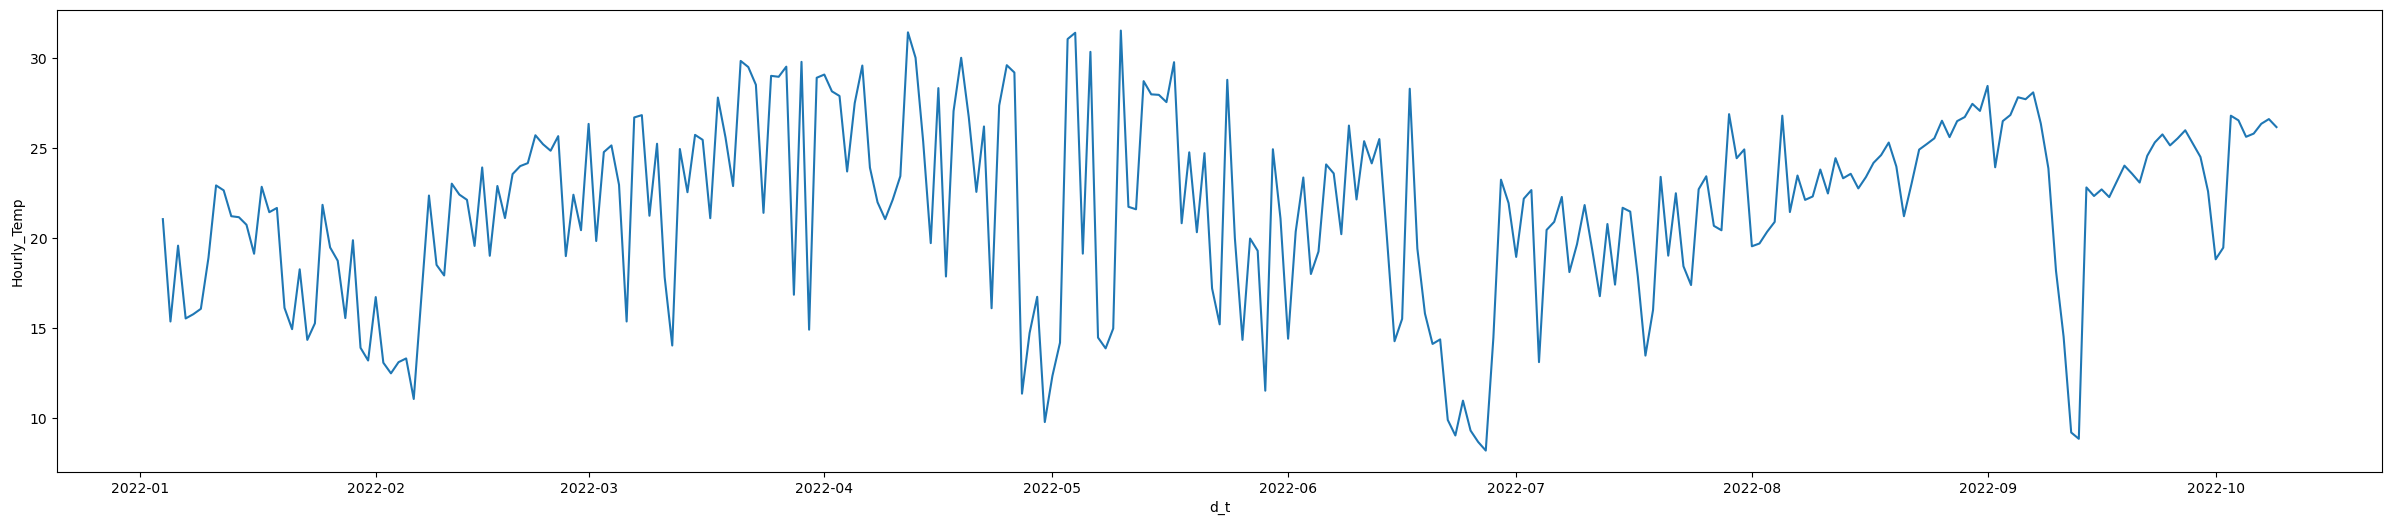

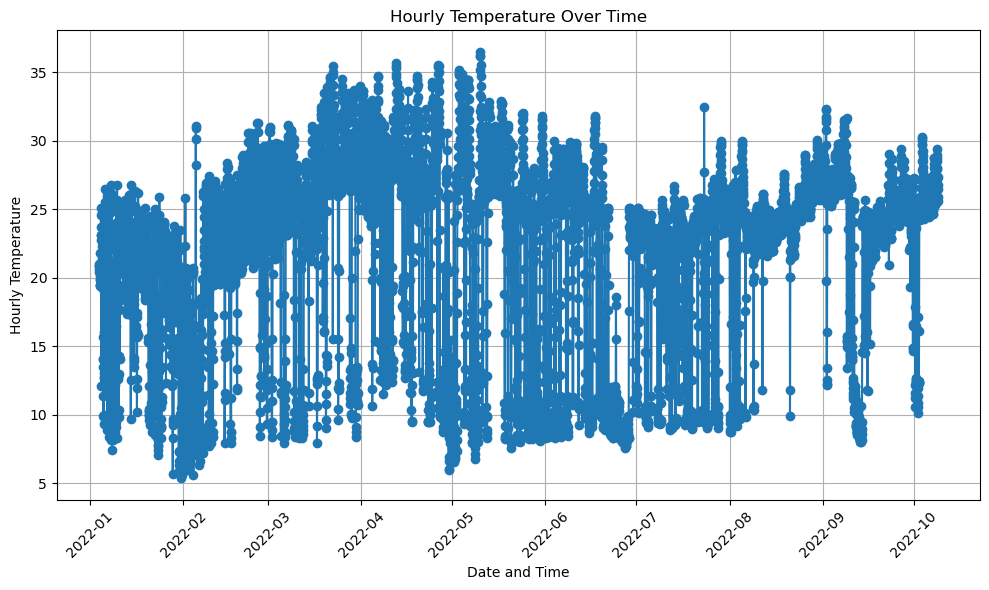

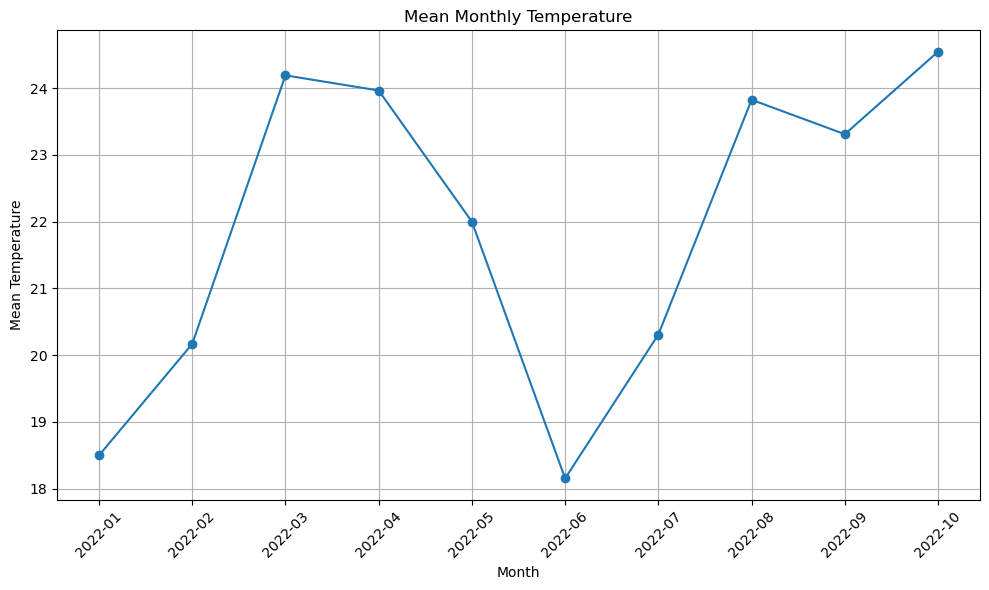

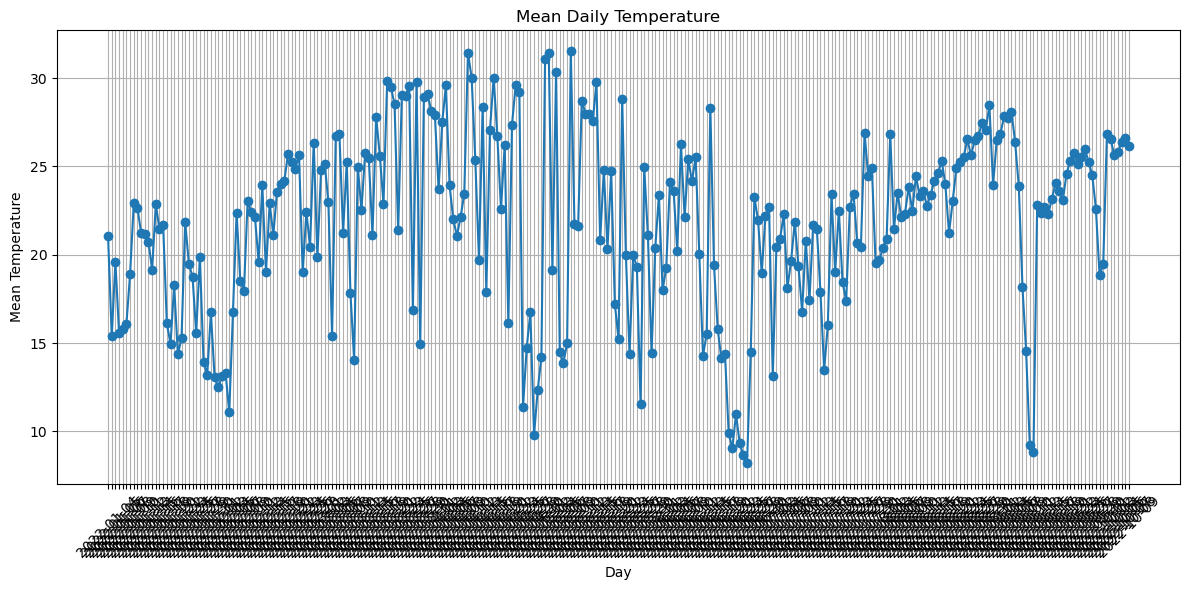

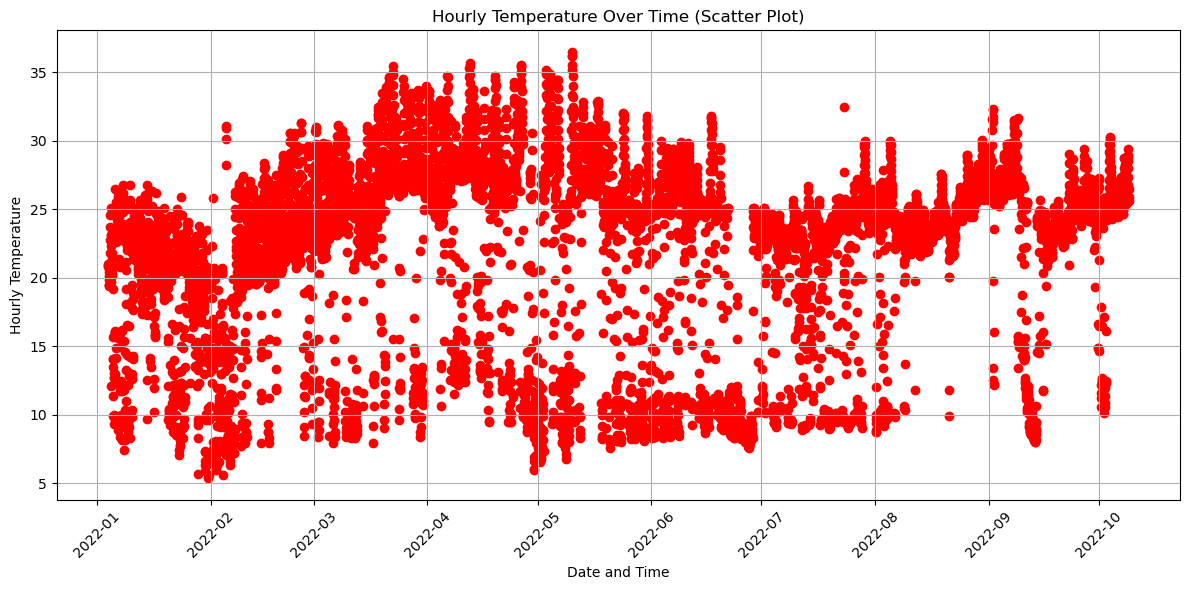

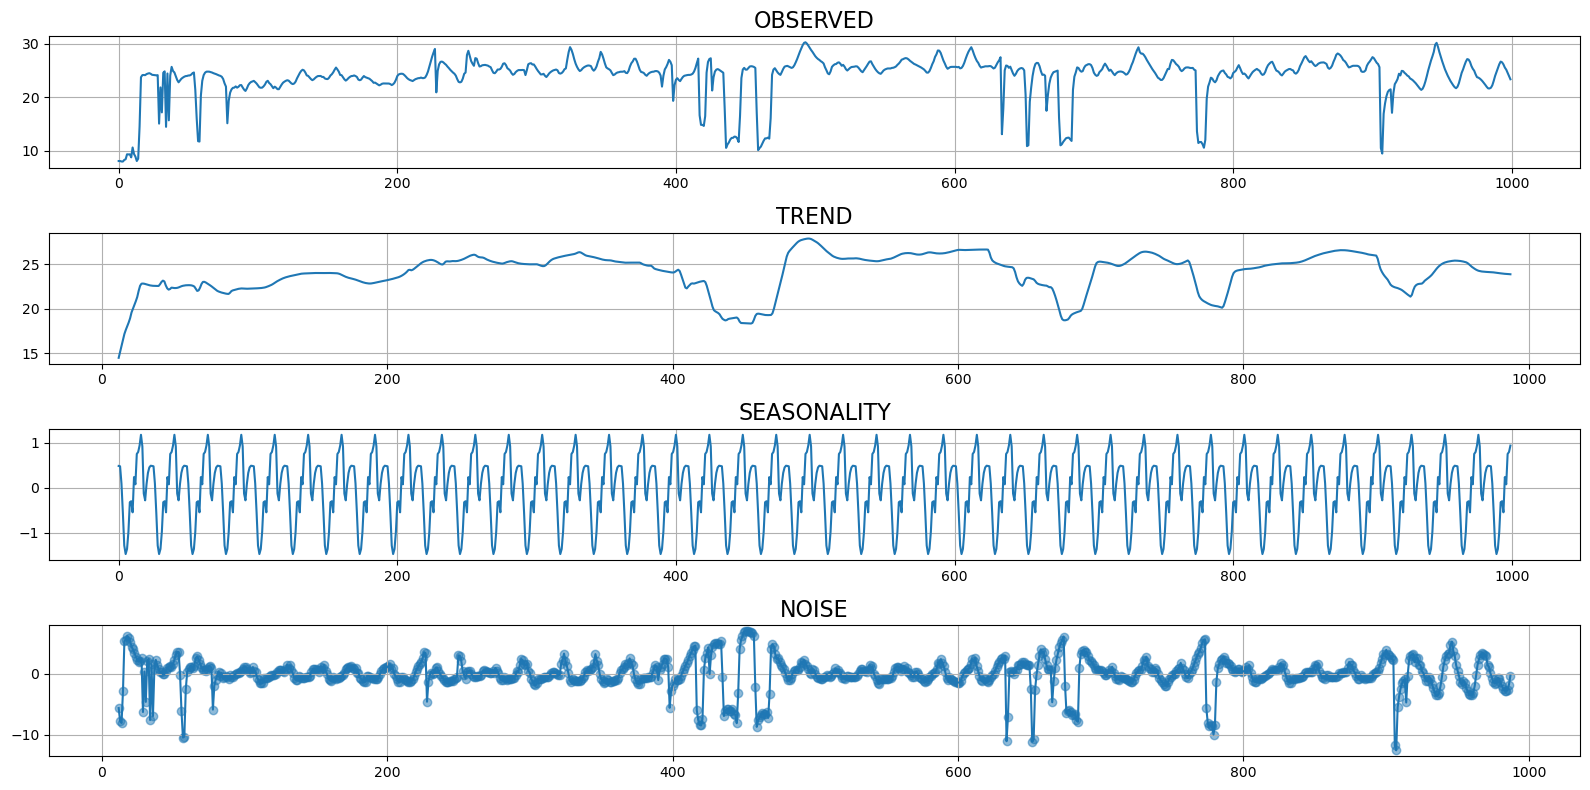

Reject the null hypothesis (series is stationary)


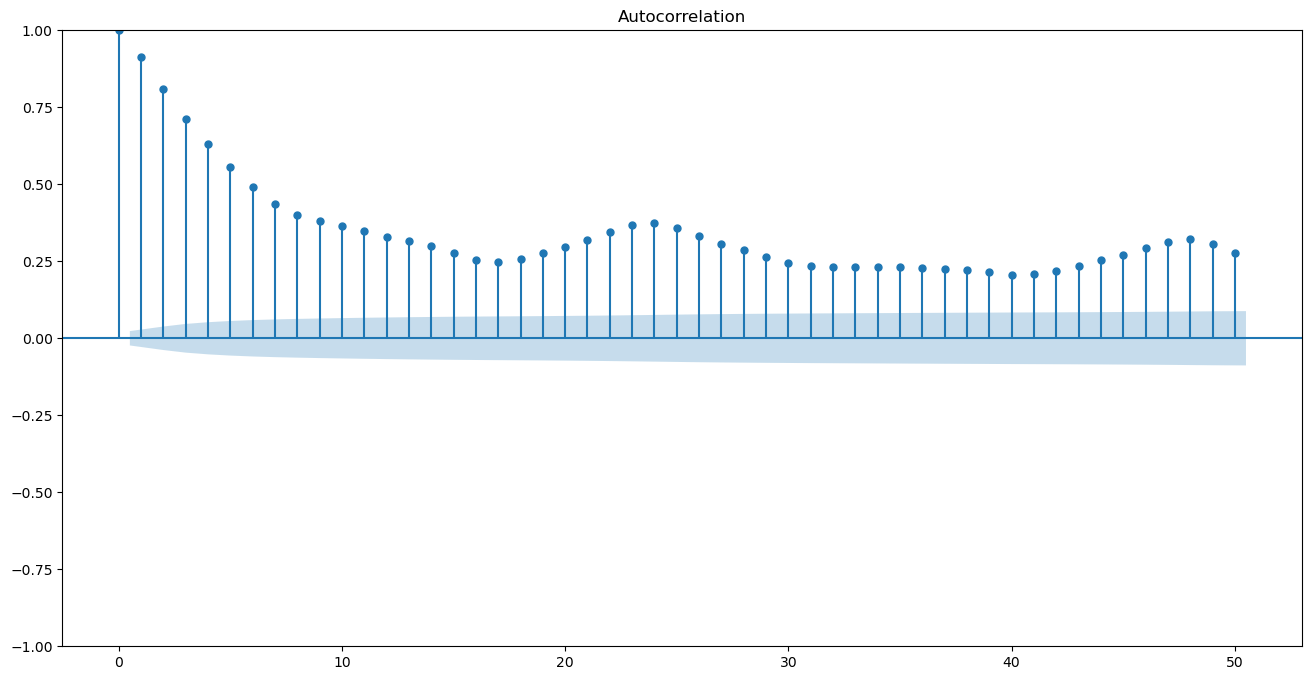

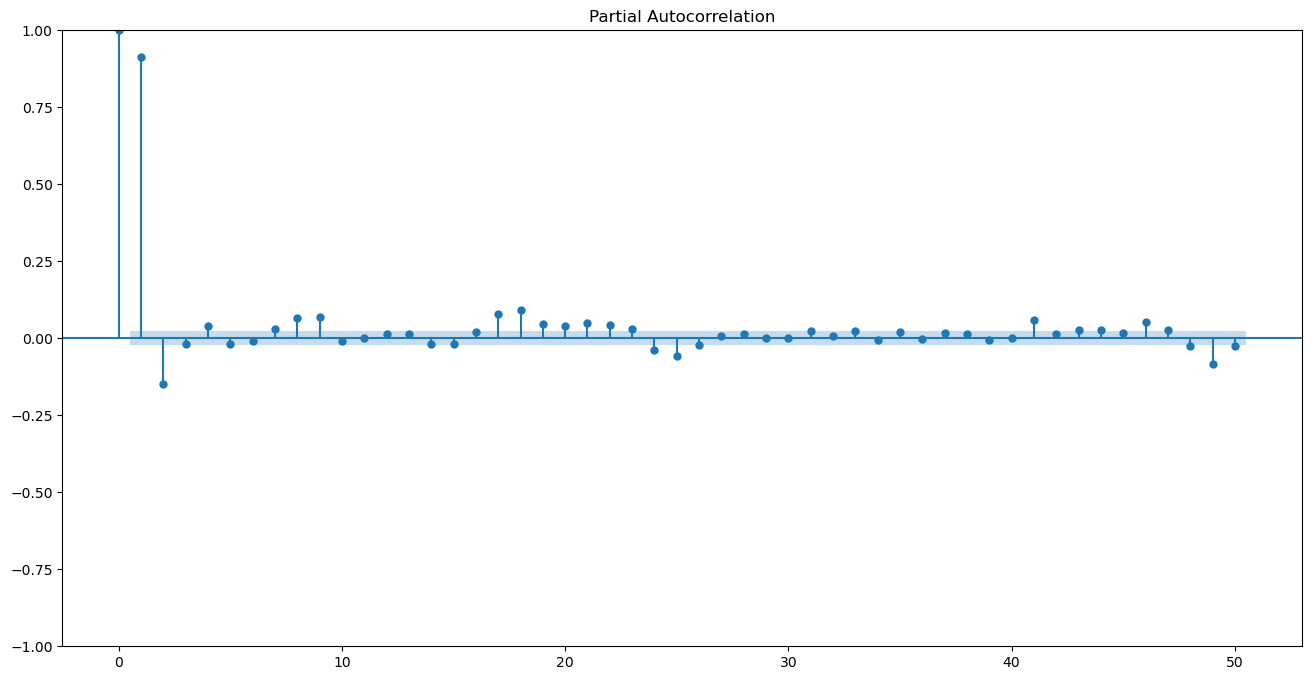

In [31]:
class Timeseries:
    def __init__(self,path,path1):
        self.data_set = pd.read_csv(path)
        self.data_set_1 = pd.read_csv(path1)
        self.data_set_1.drop(['Unnamed: 0'],axis=1,inplace=True)
        self.data_set_1['Datetime'] = pd.to_datetime(self.data_set['Datetime'])
        self.data_set_1['Date'] = self.data_set_1['Datetime'].dt.date
        # self.data_set_1=self.data_set_1.set_index('Datetime')
        

    
    def display(self):

        display(Markdown('# Displying head of MLTempDataset.csv'))
        display(self.data_set.head())
        
        self.data_set['Datetime'] = pd.to_datetime(self.data_set['Datetime'])
        
        print("\n")
        display(Markdown('# Displying Datatypes'))
        display(self.data_set.dtypes)
        print("\n\n")

        
        display(Markdown('# Displying Null values in the data set'))
        display(self.data_set.isnull().sum())
        
        display(Markdown('# Displying head of MLTempDataset1.csv'))
        # self.data_set_1['Datetime'] = pd.to_datetime(self.data_set_1['Datetime'])
        
        # self.data_set_1['Date'] = self.data_set_1['Datetime'].dt.date
        display(self.data_set_1.head())
        print("\n")
        display(Markdown('# Displying Datatypes'))
        display(self.data_set_1.dtypes)
        display(Markdown('# Displying Null values in the data set'))
        display(self.data_set.isnull().sum())
        
        mean_temp_per_date = self.data_set_1.groupby('Date')['Hourly_Temp'].mean().reset_index()

        # self.data_set_1.drop(columns=['Datetime','Date'])
        self.data_set_1.drop(columns=['Date'])
        mean_temp_of_all_data = self.data_set_1.describe()

        display(Markdown('# Mean_temp_of_all_data'))
        display(mean_temp_of_all_data)

        display(Markdown('# Mean_temp_of_data_per_date'))
        display(mean_temp_per_date.describe())

    def Finding_outliers(self):

        z_scores = stats.zscore(self.data_set_1['Hourly_Temp'])
        outlier_indices = self.data_set_1.index[abs(z_scores) > 3]
        display(outlier_indices)

    def Data_Visualize(self):
        
        self.data_set_1['d_t'] = self.data_set_1['Datetime']
        self.data_set_1.set_index('d_t', inplace=True)
        
        plt.figure(figsize=(30,6))
        sns.lineplot(data=self.data_set_1['Hourly_Temp'].resample('D').mean())
        
        plt.figure(figsize=(10, 6))
        plt.plot(self.data_set_1['Datetime'], self.data_set_1['Hourly_Temp'], marker='o', linestyle='-')
        plt.title('Hourly Temperature Over Time')
        plt.xlabel('Date and Time')
        plt.ylabel('Hourly Temperature')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        self.data_set_1['Month'] = self.data_set_1['Datetime'].dt.to_period('M')
        monthly_mean_temp = self.data_set_1.groupby('Month')['Hourly_Temp'].mean().reset_index()
        monthly_mean_temp['Month'] = monthly_mean_temp['Month'].astype(str)
        plt.figure(figsize=(10, 6))
        plt.plot(monthly_mean_temp['Month'], monthly_mean_temp['Hourly_Temp'], marker='o', linestyle='-')
        plt.title('Mean Monthly Temperature')
        plt.xlabel('Month')
        plt.ylabel('Mean Temperature')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        self.data_set_1['Day'] = self.data_set_1['Datetime'].dt.to_period('D')
        monthly_mean_temp = self.data_set_1.groupby('Day')['Hourly_Temp'].mean().reset_index()
        monthly_mean_temp['Day'] = monthly_mean_temp['Day'].astype(str)
        plt.figure(figsize=(12, 6))
        plt.plot(monthly_mean_temp['Day'], monthly_mean_temp['Hourly_Temp'], marker='o', linestyle='-')
        plt.title('Mean Daily Temperature')
        plt.xlabel('Day')
        plt.ylabel('Mean Temperature')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


        # Plot Hourly_Temp values over time using scatter plot
        plt.figure(figsize=(12, 6))
        plt.scatter(self.data_set_1['Datetime'], self.data_set_1['Hourly_Temp'], color='red', marker='o')
        plt.title('Hourly Temperature Over Time (Scatter Plot)')
        plt.xlabel('Date and Time')
        plt.ylabel('Hourly Temperature')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


      


    def Augmented_Dickey_Fuller(self):
        
        result = adfuller(self.data_set_1['Hourly_Temp'])
        p_value = result[1]
        
        if p_value <= 0.05:
            print("Reject the null hypothesis (series is stationary)")
        else:
            print("Fail to reject the null hypothesis (series is non-stationary)")

   

    def Plotter(self):
        
        # res = seasonal_decompose(x=self.data_set_1,period=24)

        self.data_set_1=self.data_set_1.set_index('Datetime')
        

        res = seasonal_decompose(x=self.data_set_1['Hourly_Temp'].iloc[-1000:].values,period=24)
      
        
        observed = res.observed
        trend = res.trend
        seasonal = res.seasonal
        residual = res.resid
        
        
        #plot the complete time series
        fig, axs = plt.subplots(4, figsize=(16,8))
        axs[0].set_title('OBSERVED', fontsize=16)
        # axs[0].plot(observed['Datetime'], observed['YourColumnName'])
        axs[0].plot(observed)
        axs[0].grid()
        
        #plot the trend of the time series
        axs[1].set_title('TREND', fontsize=16)
        axs[1].plot(trend)
        axs[1].grid()
        
        #plot the seasonality of the time series. Period=24 daily seasonality | Period=24*7 weekly seasonality.
        axs[2].set_title('SEASONALITY', fontsize=16)
        axs[2].plot(seasonal)
        axs[2].grid()
        
        #plot the noise of the time series
        axs[3].set_title('NOISE', fontsize=16)
        axs[3].plot(residual)
        axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
        axs[3].grid()
        
        plt.tight_layout()
        plt.show()

    def Acf_Pacf(self):
        lagger=50

        fig, ax = plt.subplots(figsize=(16,8))
        fig1, ax1 = plt.subplots(figsize=(16,8))
        
        _=plot_acf(x=self.data_set_1['Hourly_Temp'],ax=ax,lags=lagger)
        _=plot_pacf(x=self.data_set_1['Hourly_Temp'],method='ywm',ax=ax1,lags=lagger)
                


      
        
    

Timeseries_Analysis = Timeseries('MLTempDataset.csv','MLTempDataset1.csv')
Timeseries_Analysis.display()
Timeseries_Analysis.Finding_outliers()
Timeseries_Analysis.Data_Visualize()
Timeseries_Analysis.Plotter()
Timeseries_Analysis.Augmented_Dickey_Fuller()
Timeseries_Analysis.Acf_Pacf()

        

In [ ]:
After seeing the pacf and acf we will be taking a lag of 1,24 in Hourly_Temp column